 # Predit Titanic Survivors
 タイタニック号の生存者を予想する

 Reference

 https://www.kaggle.com/nhlr21/complete-titanic-tutorial-with-ml-nn-ensembling

 https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

# 目次
- [Load  data](#Load-data)

- [Check abstract of data]( #Check-abstract-of-data)


- [Explanatory Data Analysis](#Explanatory-Data-Analysis)
    - Survived
    - Pclass
    - Name
    - Sex
    - Age
    - SibSp
    - TicketTitle (generated from Ticket)
    - TicketLett (generated from Ticket)
    - SameTicket (generated from Ticket)
    - Parch
    - Fare
    - CabinLett (generated from Cabin)
    - Embarked

- [欠損値の処理](#欠損値の処理)
    - 欠損値の有無の確認
    - Cabinの欠損値補完
    - AgeIsnull (generated from Age)
    - Ageの欠損値補完
    - Embarkedの欠損値補完
    - Fareの欠損値補完

- [Feature Engineering](#Feature-Engineering)
    - Family Sizeの作成
    - IsAloneの作成
    - IsChildの作成
    - LogFare(Fareの対数)の作成
    - カテゴリ変数のエンコード

- Save dataframe

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
from IPython.display import display

# Ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

#from src import build_features

## Load data

In [2]:
# Path of datasets
path_train = '../data/train.csv'
path_test = '../data/test.csv'

# Create dataframe for training data and test data
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

train_orig = train.copy()
test_orig = test.copy()

 ## Check abstract of data
 - データの概要を確認する

In [3]:
#データの形式を見る
display(train.head(), test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Train dataの概要を表示
print('Information of train data\n')
print(train.info())

Information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Test dataの概要を表示
print('Information of test data\n')
print(test.info())

Information of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


 ## Explanatory Data Analysis
 - それぞれどんな分布をしているか
 - TrainとTestで差異はあるか
 - Name, Ticket, Cabinはそのままでは分析できないので、分析可能な変数にして分析

### Survived

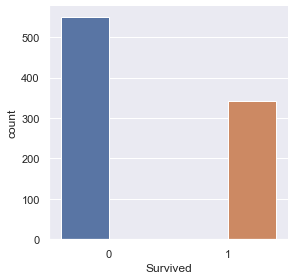

In [6]:
sns.catplot(x="Survived",data=train,kind='count', hue='Survived',height=4)

In [7]:
train.Survived.mean()

0.3838383838383838

### Pclass

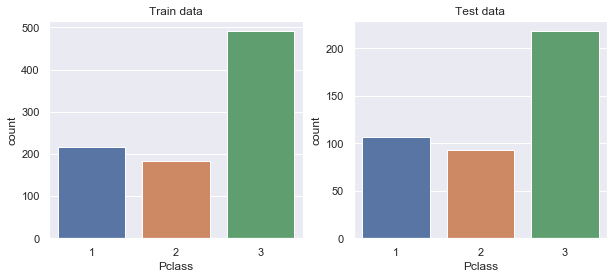

In [8]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='Pclass', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='Pclass', data=test, ax=ax2)
plt.title('Test data')

plt.show()

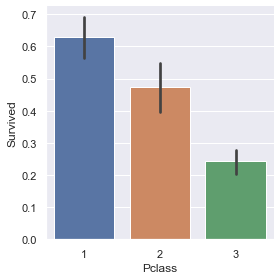

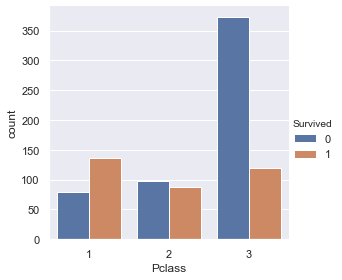

In [9]:
sns.catplot(x="Pclass",y="Survived",data=train,kind='bar', height=4)
sns.catplot(x="Pclass",data=train,kind='count', hue='Survived',height=4)

- Pclassの分布はTrainとTestでほぼ同じ
- Pclass=3の割合が多い
- Pclassが上がると生存率が下がっており、生存率に影響あり

 ### Name
 - Nameそのままでは特徴量に使えない
 - Titleの変数を作成して分析
 - LastNameの変数を作成して分析

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
def extract_nameTitle(name):
    name = str(name)
    return name.split('.')[0].split(',')[1].strip()

def extract_Lastname(name):
    name = str(name)
    return name.split('. ')[1].split(' (')[0]


### Title / TitleAgg (generated from Name)

In [12]:
# Create a Title column from name column
for df in (train, test):
    df['Title'] = df['Name'].map(extract_nameTitle)
    df['LastName'] = df['Name'].map(extract_Lastname)

In [13]:
pd.concat([train['Title'].value_counts(), test['Title'].value_counts()],axis=1,sort=False,keys=['train','test'])

,train,test
Mr,517.0,240.0
Miss,182.0,78.0
Mrs,125.0,72.0
Master,40.0,21.0
Dr,7.0,1.0
Rev,6.0,2.0
Col,2.0,2.0
Mlle,2.0,NaN
Major,2.0,NaN
Don,1.0,NaN


In [14]:
df_lastname = pd.DataFrame(pd.concat([train['LastName'],test['LastName']]).value_counts())
df_lastname[df_lastname['LastName']>1]
#pd.concat([train['LastName'].value_counts(), test['LastName'].value_counts()],axis=1,sort=False,keys=['train','test'])

,LastName
William,17
John,17
James,12
Joseph,11
Patrick,10
...,...
Julia,2
Edwin Nelson Jr,2
Andrew G,2
Henry William,2


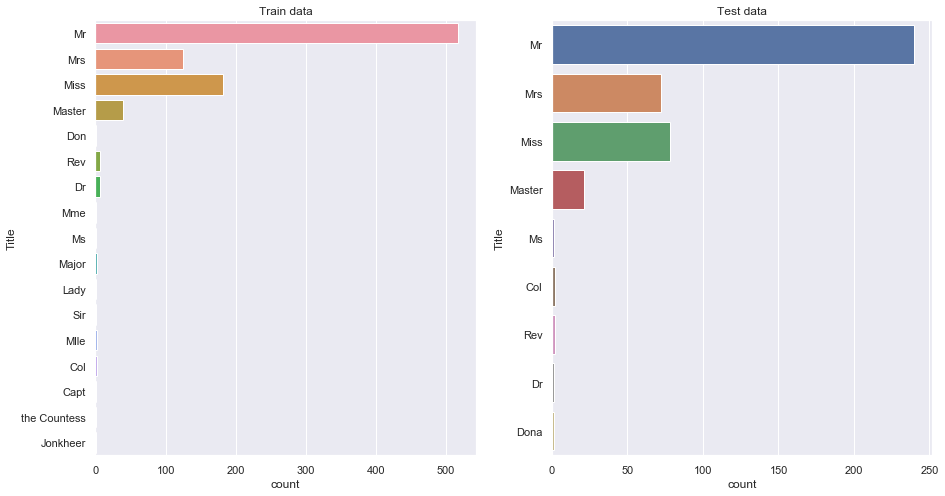

In [15]:
#Titleの分布を確認
plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='Title', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='Title', data=test, ax=ax2)
plt.title('Test data')

plt.show()

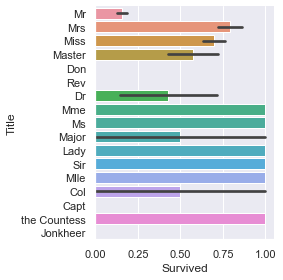

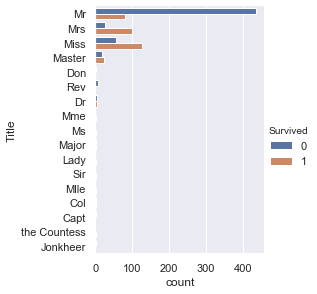

In [16]:
sns.catplot(y="Title",x="Survived",data=train,kind='bar', height=4)
sns.catplot(y="Title",data=train,kind='count', hue='Survived',height=4)

- trainにはあるが、testにはない値がある
    - 'Mlle', 'Ms'は'Miss'に統合
    - 'Mme'は'Mrs'に統合
- 以下のデータは'Rare'にまとめる
    - 'Capt', 'Don', 'Jonkheer', 'Lady','Major','Sir','the Countess'

In [17]:
# 同義語を集約、少数の値を'Rare'として集約
def map_TitleAgg(Title):
    if Title in ['Mr']:
        return 'Mr'
    elif Title in ['Mrs','Mme']:
        return 'Mrs'
    elif Title in ['Miss', 'Ms', 'Mlle']:
        return 'Miss'
    elif Title in ['Master']:
        return 'Master'
    else:
        return 'Rare'

for df in (train, test):
    df['TitleAgg'] = df['Title'].map(map_TitleAgg)

,train,test
Mr,517,240
Miss,185,79
Mrs,126,72
Master,40,21
Rare,23,6


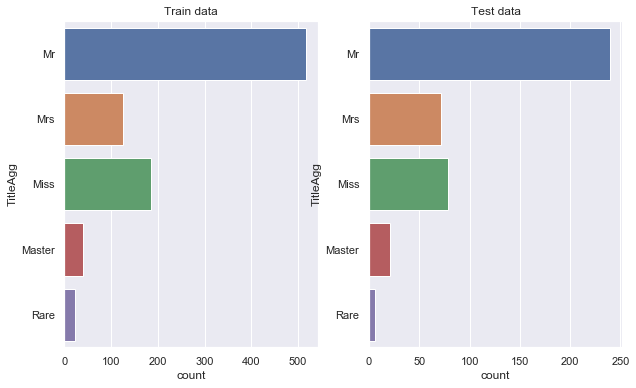

In [18]:
#Titleの分布を確認
display(pd.concat([train['TitleAgg'].value_counts(), test['TitleAgg'].value_counts()],axis=1,sort=False,keys=['train','test']))

plt.figure(figsize=(10,6))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='TitleAgg', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='TitleAgg', data=test, ax=ax2)
plt.title('Test data')
plt.show()

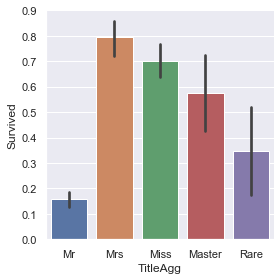

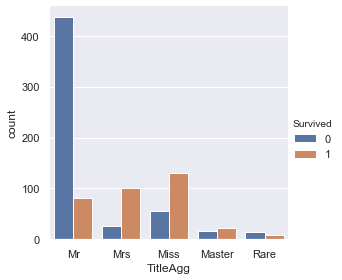

In [19]:
sns.catplot(x="TitleAgg",y="Survived",data=train,kind="bar", height=4)
sns.catplot(x="TitleAgg",data=train,kind='count', hue='Survived',height=4)

 - TitleAggが生存率に影響する
 - Mrだと生存率が低い
 - Mrs, Miss、Masterだと生存率が高い


### Sex

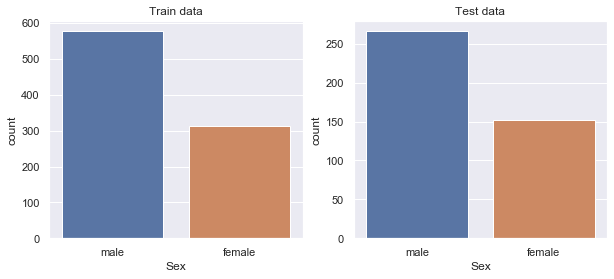

In [20]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='Sex', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='Sex', data=test, ax=ax2)
plt.title('Test data')

plt.show()

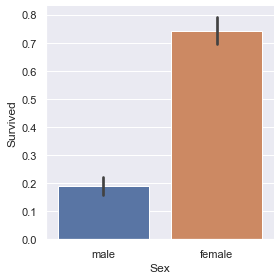

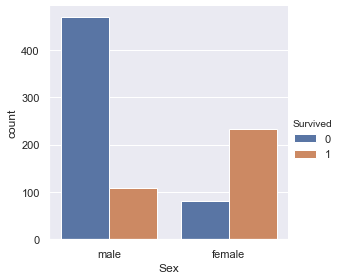

In [21]:
sns.catplot(x="Sex",y="Survived",data=train, kind="bar", height= 4)
sns.catplot(x="Sex",data=train,kind='count', hue='Survived',height=4)

 - Sexは生存率に影響を与えている
 - Femaleの方が生存率が高い

### Age

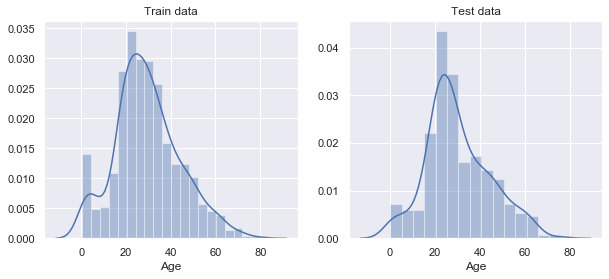

In [22]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.distplot(train.Age.dropna(), ax=ax1)
# NaNは削除してプロット
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.distplot(test.Age.dropna(), ax=ax2)
# NaNは削除してプロット
plt.title('Test data')

plt.show()

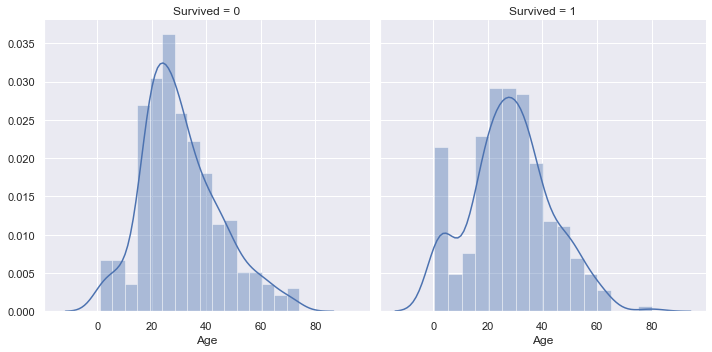

In [23]:
#sns.violinplot(x="Survived",y="Age",data=train, height= 5)
g = sns.FacetGrid(data=train, col='Survived', height =5)
g.map(sns.distplot, "Age")
plt.show()

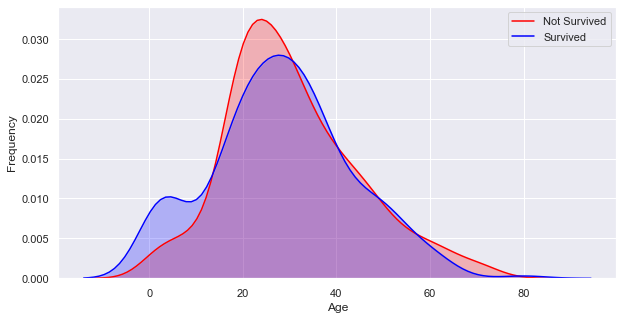

In [24]:
plt.figure(figsize=(10, 5))
#g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"].dropna()[train["Survived"] == 0], color="Red", shade = True)

#g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], color="Blue", shade= True)
g = sns.kdeplot(train["Age"].dropna()[train["Survived"] == 1], color="Blue", shade= True)

g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

 - 生存した場合と死亡した場合それぞれのヒストグラムを表示
 - 10歳以下だと生存率が高い

### SibSp

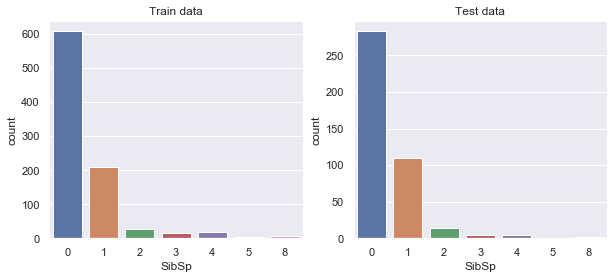

In [25]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='SibSp', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='SibSp', data=test, ax=ax2)
plt.title('Test data')

plt.show()

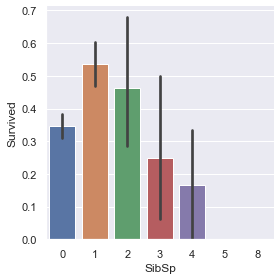

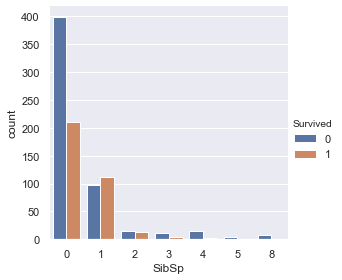

In [26]:
sns.catplot(x="SibSp",y="Survived",data=train,kind="bar", height = 4)
sns.catplot(x="SibSp",data=train,kind='count', hue='Survived',height=4)

- SibSpが1,2ときは、生存率が高い

### TicketTitle (generated from Ticket)

- Ticketのタイトル部分を変数として抽出して分析

In [27]:
def extract_TicketTitle(ticket):
    if ' ' in ticket:
        return ticket.split(' ')[0]
    else:
        return "Notitle"
    
for df in [train, test]:
    df['TicketTitle'] = df['Ticket'].map(extract_TicketTitle)

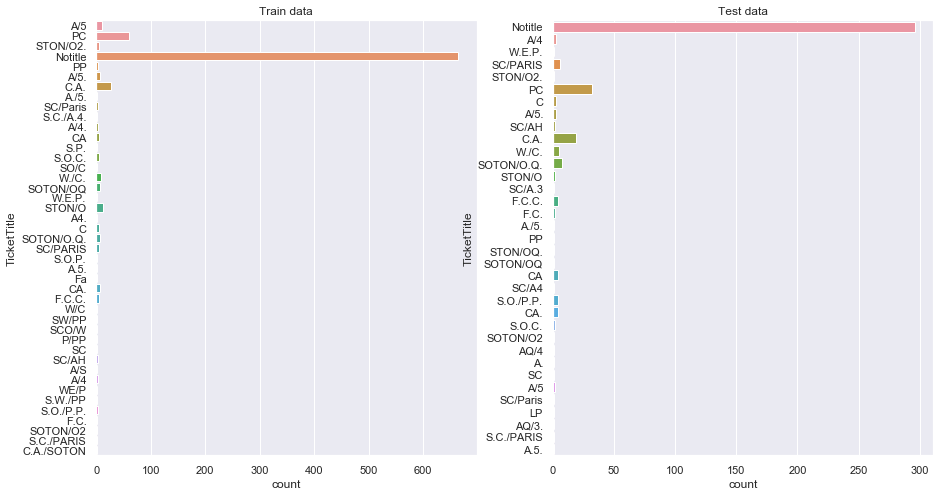

In [28]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='TicketTitle', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='TicketTitle', data=test, ax=ax2)
plt.title('Test data')

plt.show()

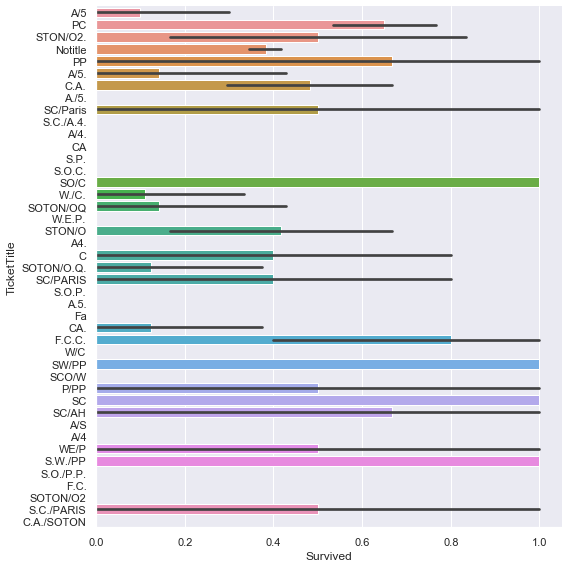

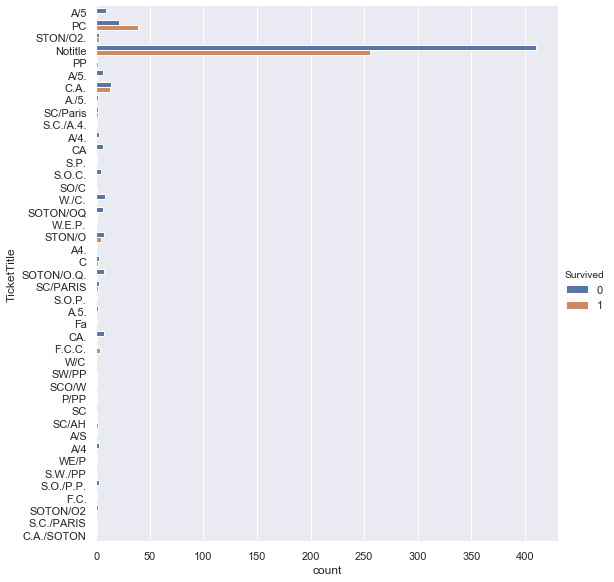

In [29]:
sns.catplot(y="TicketTitle",x="Survived",data=train,kind="bar", height = 8)
sns.catplot(y="TicketTitle",data=train,kind='count', hue='Survived',height=8)

- TicketTitleはほとんどがNotitle
- TicketTitleは生存率には影響がなさそう

### TicketLett (generated from Ticket)

- Ticketの最初の文字を変数として抽出して分析

In [30]:
def extract_TicketLett(ticket):
    return ticket[0]

for df in [train, test]:
    df['TicketLett'] = df['Ticket'].map(extract_TicketLett)

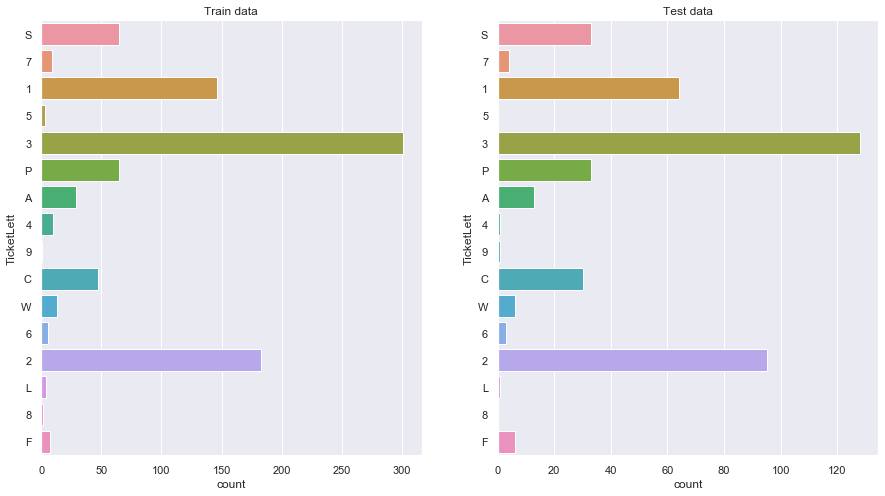

In [31]:
order_TicketLett = set(pd.concat([train.TicketLett, test.TicketLett]))

plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='TicketLett', data=train, ax=ax1, order = order_TicketLett)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='TicketLett', data=test, ax=ax2, order = order_TicketLett)
plt.title('Test data')

plt.show()

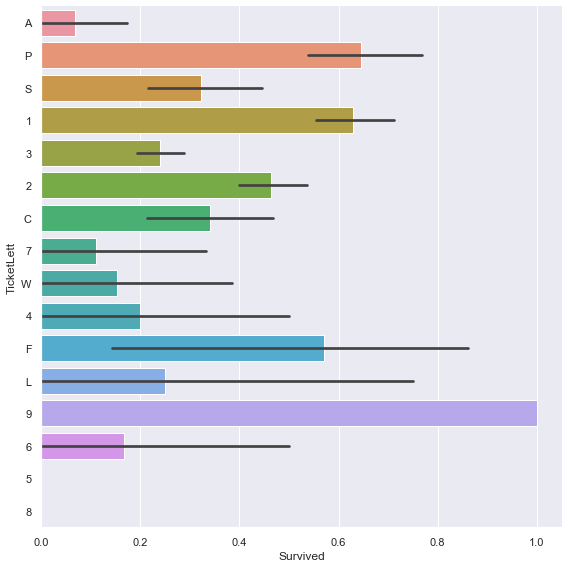

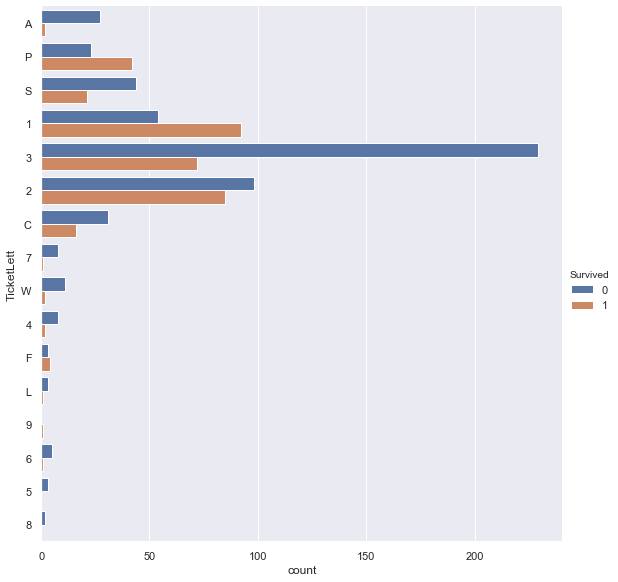

In [32]:
sns.catplot(y="TicketLett",x="Survived",data=train,kind="bar", height = 8)
sns.catplot(y="TicketLett",data=train,kind='count', hue='Survived',height=8)

- TicketLettは変数として有用そう

### SameTicket (generated from Ticket)

- 同一のTicketを持つ人数を変数として抽出して分析

In [33]:
def make_SameTicketDict(train_test_df):
    sameticket_dict = train_test_df.groupby('Ticket')['PassengerId'].count().to_dict()
    return sameticket_dict


def add_SameTicket(train_df, test_df, remove_Ticket=False):
    new_train_df = train_df.copy()
    new_test_df = test_df.copy()
    dataset_df = pd.concat([new_train_df,new_test_df], sort=False)

    SameTicketDict = make_SameTicketDict(dataset_df)

    for df in (new_train_df, new_test_df):
        df['SameTicket'] = df['Ticket'].map(SameTicketDict)
        if remove_Ticket:
            df.drop(columns=['Ticket'], inplace=True)

    return new_train_df, new_test_df


train, test = add_SameTicket(train, test)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,TitleAgg,TicketTitle,TicketLett,SameTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Mr,A/5,A,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley,Mrs,PC,P,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Miss,STON/O2.,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath,Mrs,Notitle,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Mr,Notitle,3,1


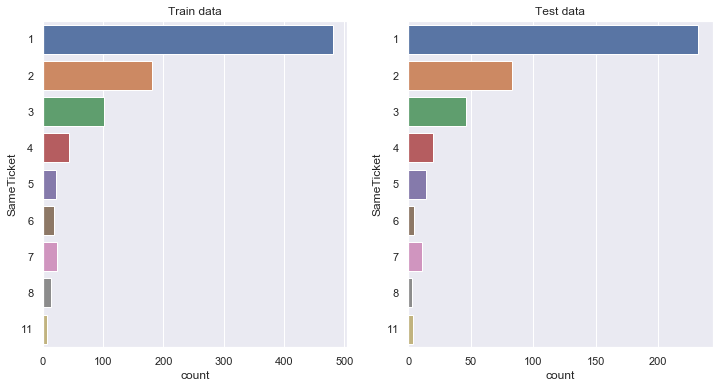

In [35]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='SameTicket', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='SameTicket', data=test, ax=ax2)
plt.title('Test data')

plt.show()

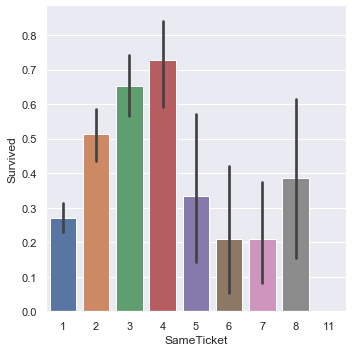

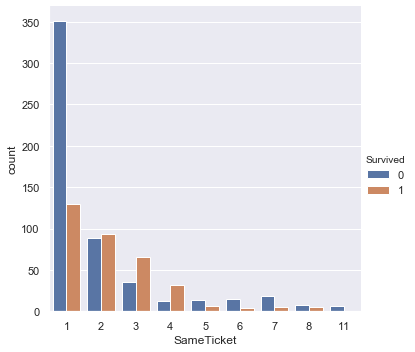

In [36]:
sns.catplot(x="SameTicket",y="Survived",data=train,kind="bar", height = 5)
sns.catplot(x="SameTicket",data=train,kind='count', hue='Survived',height=5)

- SameTicketは生存率と関連あり
- SameTicketが2,3,4のときに生存率高い一方で、0, 6,7は生存率が低い

### Parch

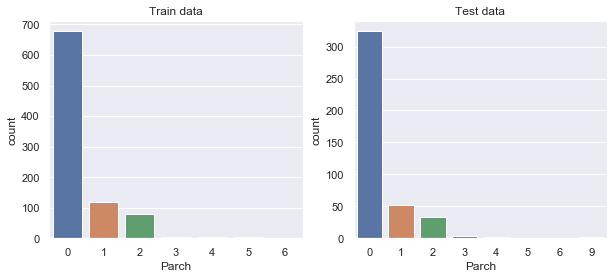

In [37]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='Parch', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='Parch', data=test, ax=ax2)
plt.title('Test data')

plt.show()

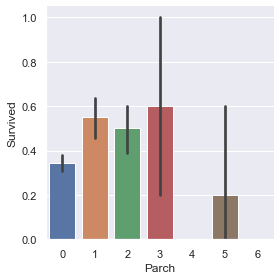

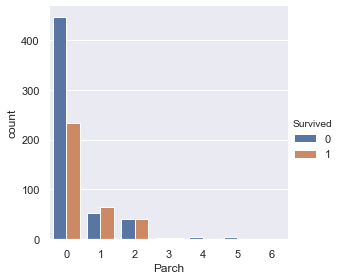

In [38]:
sns.catplot(x="Parch",y="Survived",data=train,kind="bar", height = 4)
sns.catplot(x="Parch",data=train,kind='count', hue='Survived',height=4)

- Parchが0のときは、生存率が低い

### Fare

In [39]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [40]:
 test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

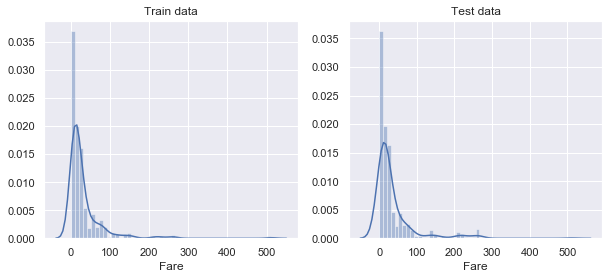

In [41]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.distplot(train.Fare.dropna(), ax=ax1)
# NaNは削除してプロット
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.distplot(test.Fare.dropna(), ax=ax2)
# NaNは削除してプロット
plt.title('Test data')

plt.show()

 - Fareの分布は歪んでいるので、対数に変換した方がよさそう。
 - Fareには欠損値が含まれているので、欠損を補完してから対数に変換する

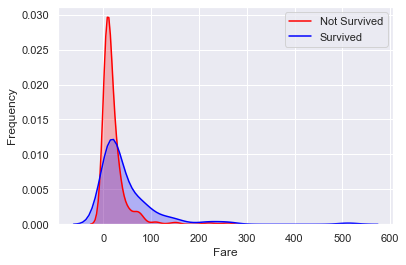

In [42]:
g = sns.kdeplot(train["Fare"].dropna()[(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["Fare"].dropna()[(train["Survived"] == 1)], color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [43]:
print("死亡者のFare統計情報")
train.Fare[train.Survived==0].describe()

死亡者のFare統計情報


count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [44]:
print("生存者のFare統計情報")
train.Fare[train.Survived==1].describe()

生存者のFare統計情報


count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

 - 死亡した場合には、Fareがより低いところでピークになっている。
 - 生存した場合には、Fareが高いところでの頻度が高い

### CabinLett (generated from Cabin)

In [45]:
for df in [train, test]:
    df['CabinLett'] = df['Cabin'].str[:1]
    df['CabinLett'] = df['CabinLett'].fillna('X')

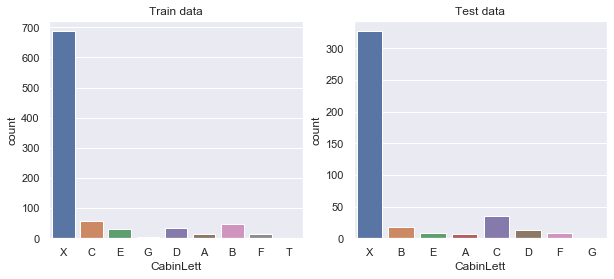

In [46]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='CabinLett', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='CabinLett', data=test, ax=ax2)
plt.title('Test data')

plt.show()

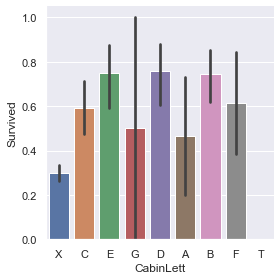

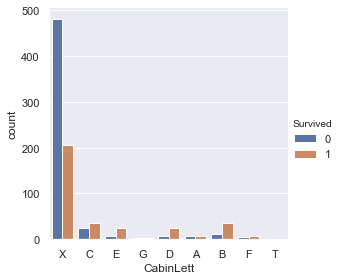

In [47]:
sns.catplot(x="CabinLett",y="Survived",data=train, kind="bar", height= 4)
sns.catplot(x="CabinLett",data=train,kind='count', hue='Survived',height=4)

- CabinLett(Cabin)が欠損だった場合の生存率が低い。欠損だったか否かが重要な説明変数になる。
- CabinLettが"B, C, D, E, F"のときは生存率が６割以上

### Embarked

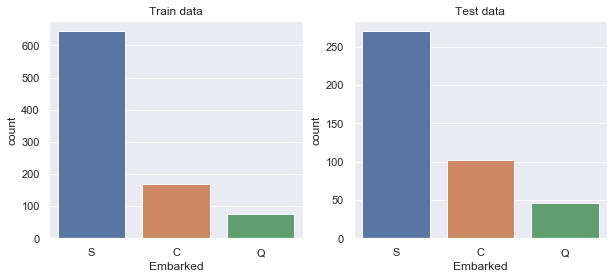

In [48]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='Embarked', data=train, order=['S','C','Q'],ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='Embarked', data=test, order=['S','C','Q'],ax=ax2)
plt.title('Test data')

plt.show()

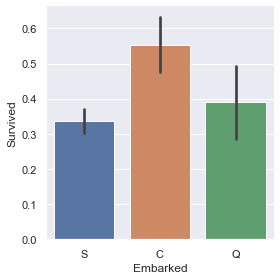

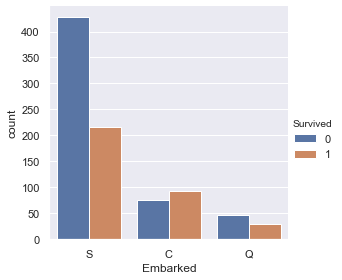

In [49]:
sns.catplot(x="Embarked",y="Survived",data=train,kind="bar", height = 4)
sns.catplot(x="Embarked",data=train,kind='count', hue='Survived',height=4)

- Embarked="C"のときに生存率が高い

 ## 外れ値
 ここでは、各分布が不明であるため、外れ値（異常値）はないとする

 ## 欠損値の処理

### 欠損値の有無確認

In [50]:
#Count the number of null data per columns for train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
LastName         0
TitleAgg         0
TicketTitle      0
TicketLett       0
SameTicket       0
CabinLett        0
dtype: int64

In [51]:
#Count the number of null data per columns for test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
LastName         0
TitleAgg         0
TicketTitle      0
TicketLett       0
SameTicket       0
CabinLett        0
dtype: int64

- Train dataには'Age', 'Cabin', 'Embarked'に欠損がある
- Test dataには'Age', 'Cabin', 'Fare'に欠損がある

### Cabin

- Cabinの欠損値は"X"とする

In [52]:
for df in (train, test):
    df['Cabin'] = df['Cabin'].fillna('X')

### AgeIsnull (generated from Age)

In [53]:
for df in (train, test):
    df['AgeIsnull'] = df['Age'].isnull().astype(int)

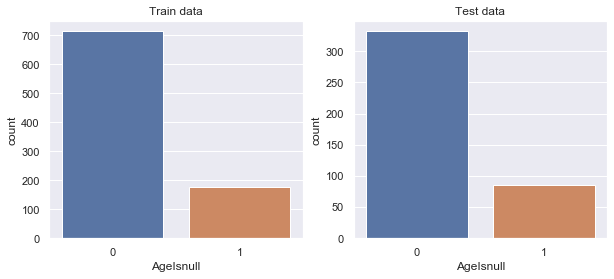

In [54]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.countplot(x='AgeIsnull', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(x='AgeIsnull', data=test, ax=ax2)
plt.title('Test data')

plt.show()

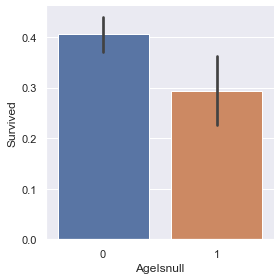

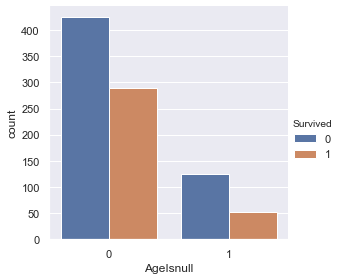

In [55]:
sns.catplot(x="AgeIsnull",y="Survived",data=train,kind="bar", height = 4)
sns.catplot(x="AgeIsnull",data=train,kind='count', hue='Survived',height=4)

### Ageの欠損値補完

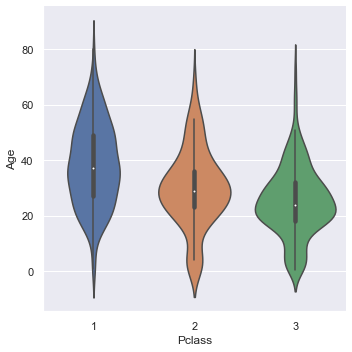

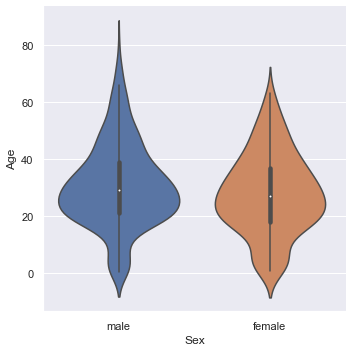

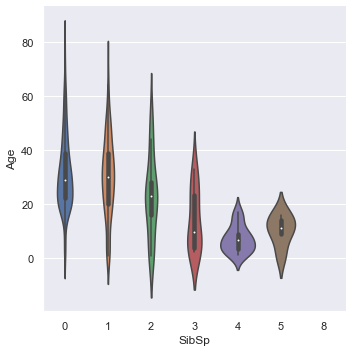

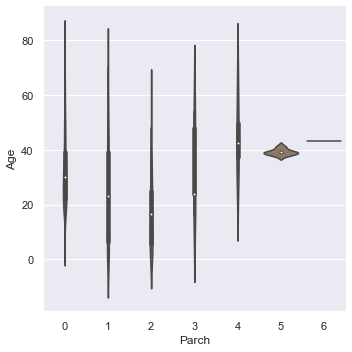

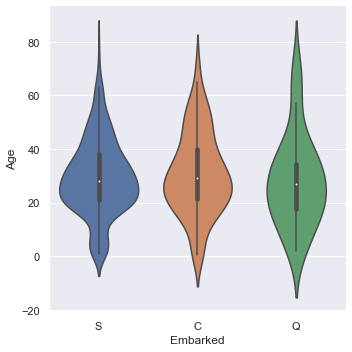

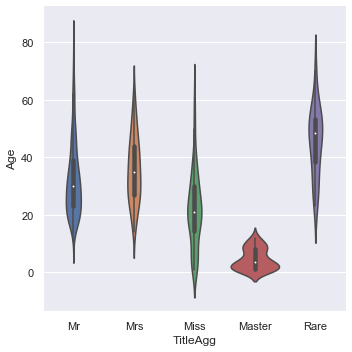

In [56]:
for feature in ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "TitleAgg"]:
    sns.catplot(x=feature, y='Age', data = train,kind="violin")

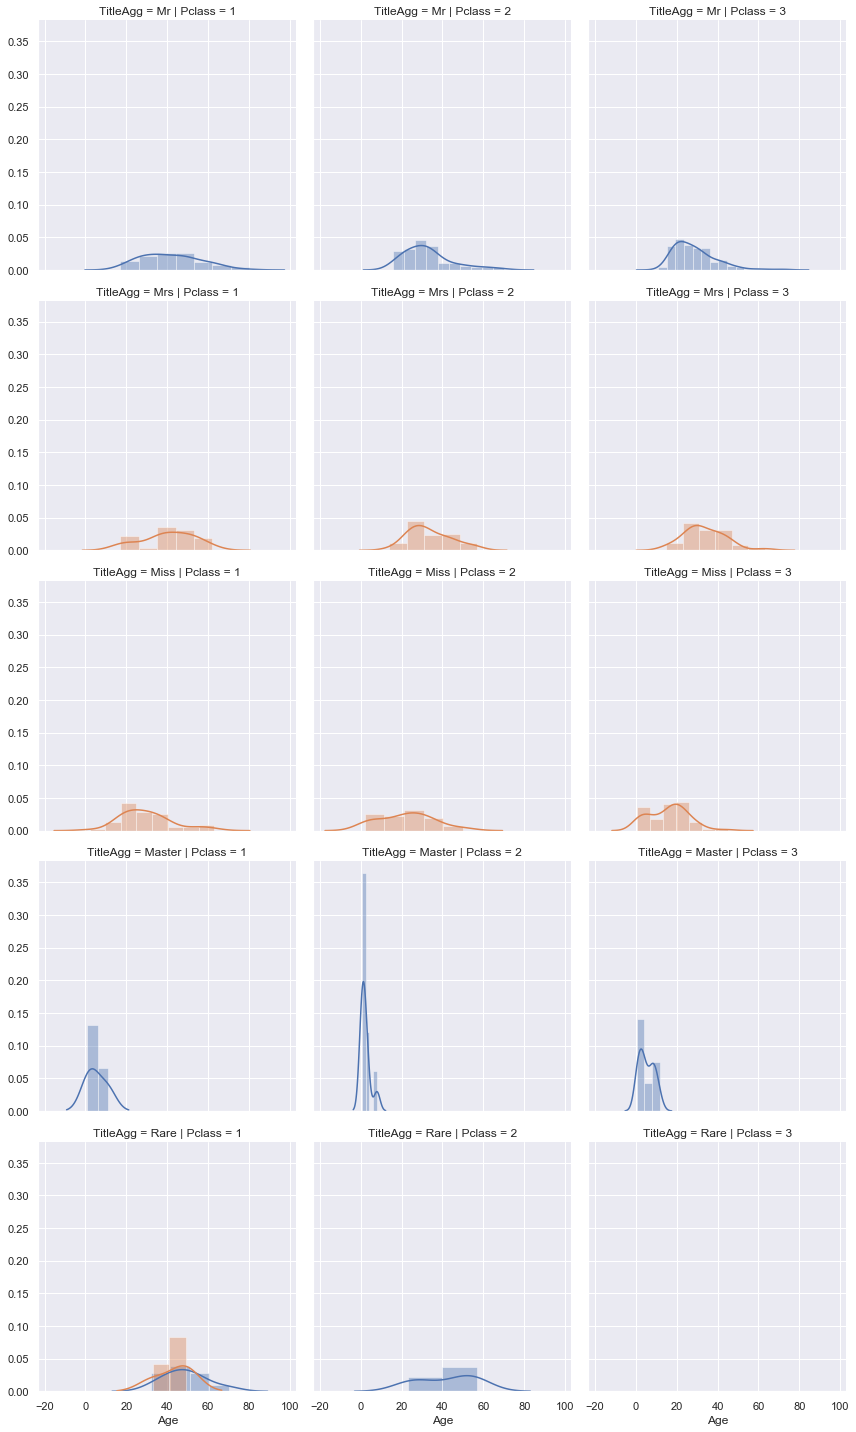

In [57]:
grid = sns.FacetGrid(train, row="TitleAgg", col="Pclass",hue="Sex", height=4)
grid.map(sns.distplot, "Age")

In [58]:
train.groupby(['Pclass','Sex', 'TitleAgg'])['Age'].median()

Pclass  Sex     TitleAgg
1       female  Miss        30.0
                Mrs         40.0
                Rare        48.0
        male    Master       4.0
                Mr          40.0
                Rare        49.0
2       female  Miss        24.0
                Mrs         32.0
        male    Master       1.0
                Mr          31.0
                Rare        46.5
3       female  Miss        18.0
                Mrs         31.0
        male    Master       4.0
                Mr          26.0
Name: Age, dtype: float64

In [59]:
#train.groupby(['Pclass','Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median())).head(10)
for df in (train, test):
    df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex', 'TitleAgg'])['Age'].transform("median"))

### Embarkedの欠損値補完

In [60]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,TitleAgg,TicketTitle,TicketLett,SameTicket,CabinLett,AgeIsnull
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,Amelie,Miss,Notitle,1,2,B,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,George Nelson,Mrs,Notitle,1,2,B,0


- 対象の乗客は２名とも下記の値が同一
    - Ticket ="113572"
    - Cabin(CabinLett) = "B"
    - Sex ="female"
    - Fare = 80.0
    - Pclass = 1
- Embarkedは２名とも同一の値であると推定される

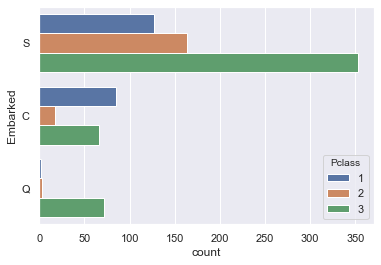

In [61]:
sns.countplot(y="Embarked", data=train, hue="Pclass")

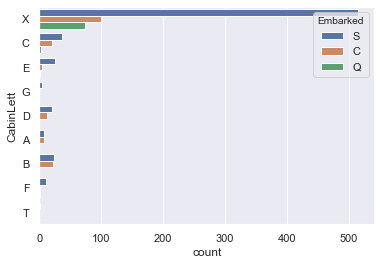

In [62]:
sns.countplot(y="CabinLett", data=train, hue="Embarked")

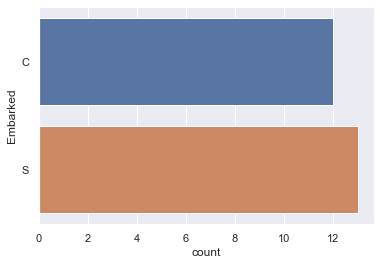

In [63]:
sns.countplot(y='Embarked',data=train[(train.Pclass==1)&(train.Sex=="female")&(train.CabinLett=="B")])

- Embarkedの欠損値は"S"とする

In [64]:
for df in (train, test):
    df['Embarked'] = df['Embarked'].fillna("S")

### Fareの欠損値補完

In [65]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,TitleAgg,TicketTitle,TicketLett,SameTicket,CabinLett,AgeIsnull
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S,Mr,Thomas,Mr,Notitle,3,1,X,0


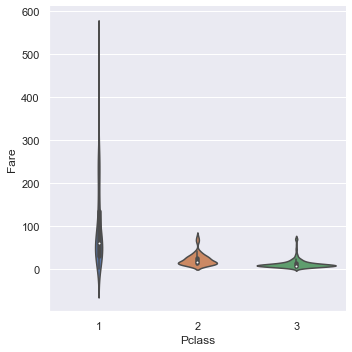

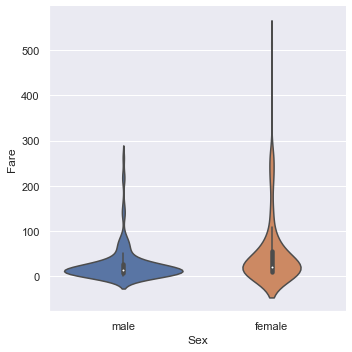

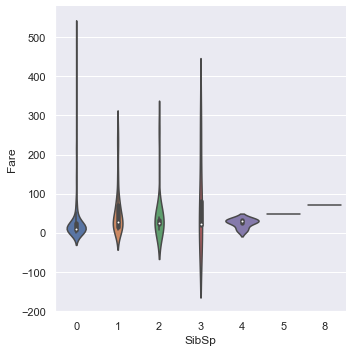

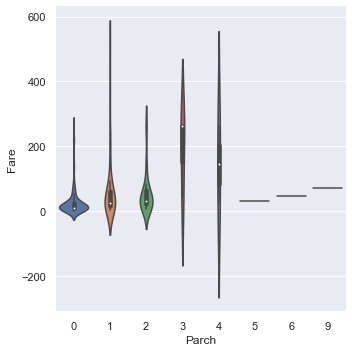

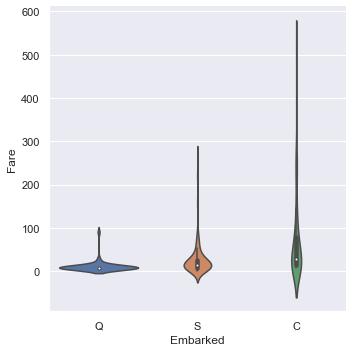

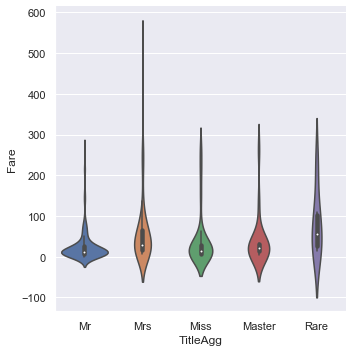

In [66]:
for feature in ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "TitleAgg"]:
    sns.catplot(x=feature, y='Fare', data = test, kind="violin")

 Pclass=3, Embarked='S','Sex','Titleの平均とする。

In [67]:
print(test.groupby(['Pclass','Embarked','Sex','TitleAgg'])['Fare'].median())
#print(test.groupby(['Pclass','Embarked','Sex','TitleAgg'])['Fare'].std())

Pclass  Embarked  Sex     TitleAgg
1       C         female  Miss         98.23960
                          Mrs          79.20000
                          Rare        108.90000
                  male    Master      198.43750
                          Mr           66.33125
                          Rare        128.01250
        Q         female  Mrs          90.00000
        S         female  Miss        188.10210
                          Mrs          53.10000
                  male    Mr           41.00000
                          Rare         81.85830
2       C         female  Miss         27.71875
                          Mrs          32.36250
                  male    Mr           15.03330
        Q         male    Mr           11.52915
        S         female  Miss         24.50000
                          Mrs          24.50000
                  male    Master       27.75000
                          Mr           13.00000
                          Rare         19.50000
3    

In [68]:
test['Fare'] = test.groupby(['Pclass','Embarked','Sex','TitleAgg'])['Fare'].transform(lambda x: x.fillna(x.median()))

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Title          418 non-null object
LastName       418 non-null object
TitleAgg       418 non-null object
TicketTitle    418 non-null object
TicketLett     418 non-null object
SameTicket     418 non-null int64
CabinLett      418 non-null object
AgeIsnull      418 non-null int64
dtypes: float64(2), int64(6), object(11)
memory usage: 62.2+ KB


 ## Feature Engineering
 - 新しい特徴量を見つける
 - カテゴリ変数を数値化する

### Family Sizeの作成
- SibSp,Parchからfamily sizeの特徴を作成

In [70]:
# Create a Family Size
for df in (train,test):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

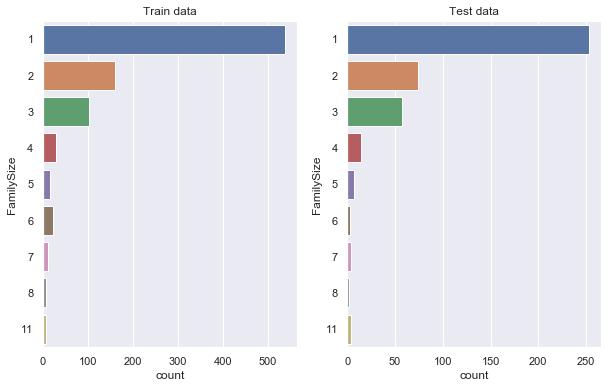

In [71]:
#Family sizeの分布を確認
plt.figure(figsize=(10,6))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='FamilySize', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='FamilySize', data=test, ax=ax2)
plt.title('Test data')

plt.show()

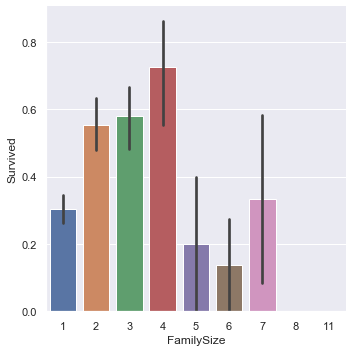

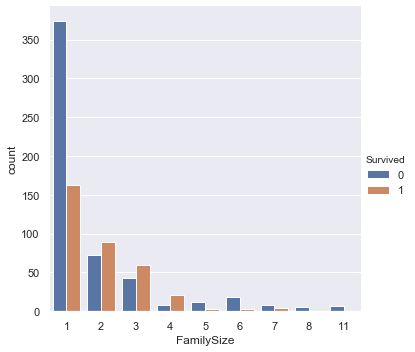

In [72]:
sns.catplot(x="FamilySize",y="Survived",data=train,kind="bar", height = 5)
sns.catplot(x="FamilySize", data=train, kind="count",hue="Survived", height=5)
#sns.factorplot(x="FamilySize",y="Survived",data=train,kind="bar", height = 5)

- Family Sizeが2,3,4のときに生存率が高い

 ### IsAloneの作成
 FamilySizeを用いて作成

In [73]:
# FamilySizeが1のときにIsAlone=1、それ以外は0とする
for df in (train,test):
    df['IsAlone'] = (df['FamilySize']==1).astype(int)


Text(0.5, 1.0, 'Test data')

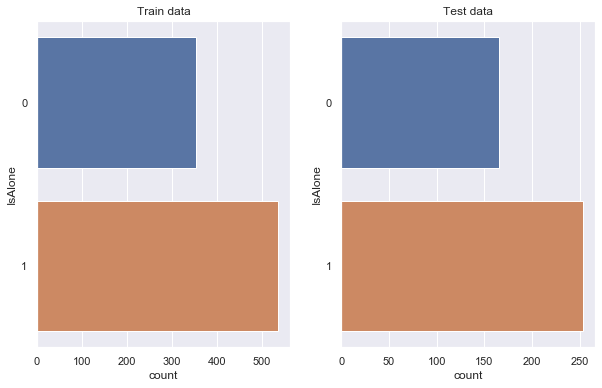

In [74]:
#Family sizeの分布を確認
plt.figure(figsize=(10,6))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='IsAlone', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='IsAlone', data=test, ax=ax2)
plt.title('Test data')

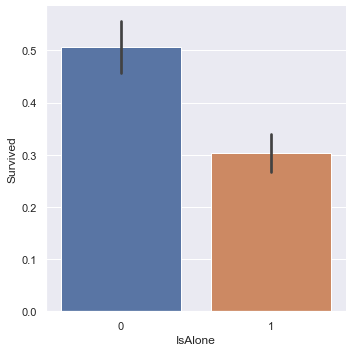

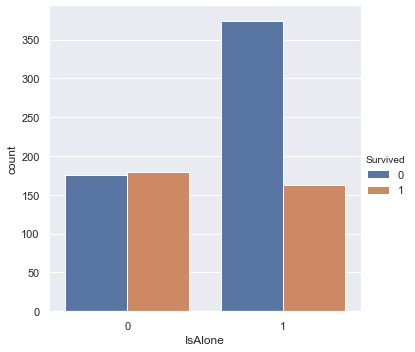

In [75]:
sns.catplot(x="IsAlone",y="Survived",data=train,kind="bar", height = 5)
sns.catplot(x="IsAlone", data=train, kind="count",hue="Survived", height=5)

### IsChildの作成
- Ageに基づき、１５歳未満の場合はIsChild=1とする

In [76]:
# IsChildを追加
for df in (train, test):
    df['IsChild'] = (df['Age'] < 15).astype(int)

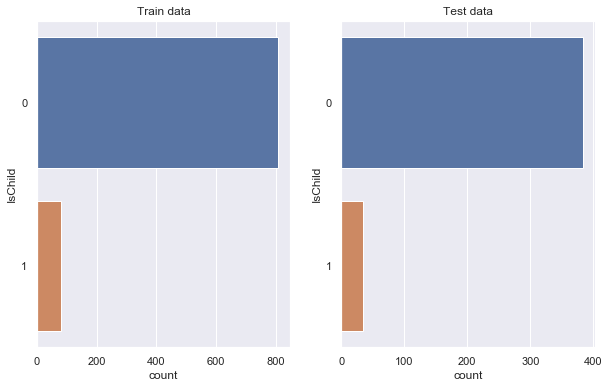

In [77]:
#IsChildの分布を確認
plt.figure(figsize=(10,6))

ax1 = plt.subplot(1,2,1)
sns.countplot(y='IsChild', data=train, ax=ax1)
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.countplot(y='IsChild', data=test, ax=ax2)
plt.title('Test data')

plt.show()

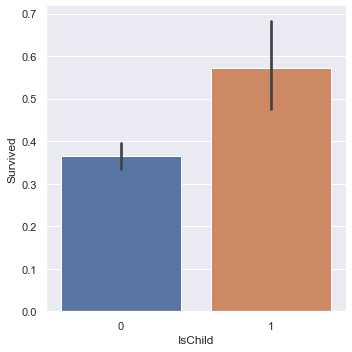

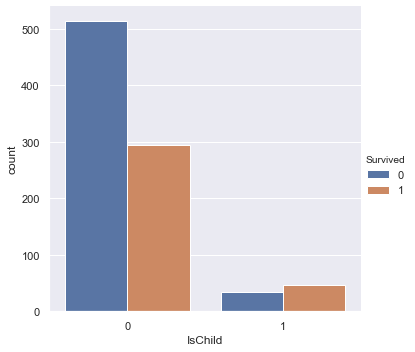

In [78]:
sns.catplot(x="IsChild",y="Survived",data=train,kind="bar", height = 5)
sns.catplot(x="IsChild", data=train, kind="count",hue="Survived", height=5)

### LogFare(Fareの対数)の作成

In [79]:
for df in (train, test):
    df["LogFare"] = df["Fare"].map(lambda x: np.log10(x) if x > 0.0 else 0.0)

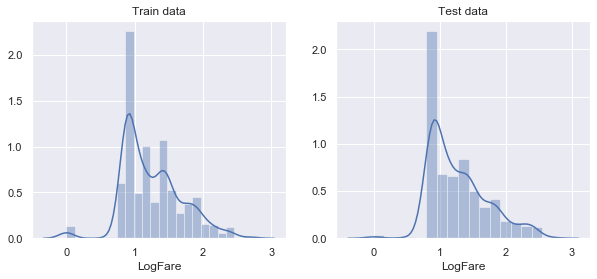

In [80]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.distplot(train.LogFare, ax=ax1)
# NaNは削除してプロット
plt.title('Train data')

ax2 = plt.subplot(1,2,2)
sns.distplot(test.LogFare, ax=ax2)
# NaNは削除してプロット
plt.title('Test data')

plt.show()

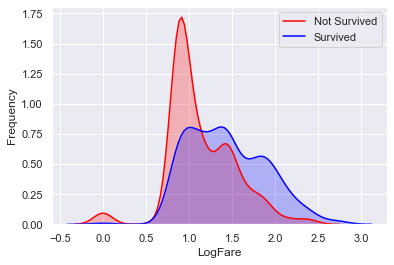

In [81]:
g = sns.kdeplot(train["LogFare"][(train["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train["LogFare"][(train["Survived"] == 1)], color="Blue", shade= True)
g.set_xlabel("LogFare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

### カテゴリ変数のエンコード

In [82]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
LastName        object
TitleAgg        object
TicketTitle     object
TicketLett      object
SameTicket       int64
CabinLett       object
AgeIsnull        int64
FamilySize       int64
IsAlone          int64
IsChild          int64
LogFare        float64
dtype: object

特徴量に用いるカテゴリ変数は
- Sex
- Embarked
- TitleAgg
- CabinLett
- TicketLett

 ### カテゴリ変数Sex, Embarked, TitleAgg, CabinLett, TicketLettをエンコーディング

In [83]:
for column in ['Sex', 'Embarked', "TitleAgg", "CabinLett", "TicketLett"]:
    categories = set(train[column].unique().tolist() + test[column].unique().tolist())
    
    train[column] = pd.Categorical(train[column], categories=categories)
    test[column] = pd.Categorical(test[column], categories=categories)

In [84]:
cat_columns = ['Sex', 'Embarked', "TitleAgg", "CabinLett", "TicketLett"]
cat_prefixs = ['Sex', 'Em', "Tit", "Cab", "Tick"]

train= pd.get_dummies(train, columns = cat_columns,prefix=cat_prefixs, drop_first=True)
test= pd.get_dummies(test, columns = cat_columns,prefix=cat_prefixs, drop_first=True)

In [85]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Title', 'LastName', 'TicketTitle',
        'SameTicket', 'AgeIsnull', 'FamilySize', 'IsAlone', 'IsChild',
        'LogFare', 'Sex_male', 'Em_Q', 'Em_C', 'Tit_Mrs', 'Tit_Miss',
        'Tit_Rare', 'Tit_Mr', 'Cab_G', 'Cab_T', 'Cab_A', 'Cab_C', 'Cab_X',
        'Cab_E', 'Cab_F', 'Cab_D', 'Tick_7', 'Tick_1', 'Tick_5', 'Tick_3',
        'Tick_P', 'Tick_A', 'Tick_4', 'Tick_9', 'Tick_C', 'Tick_W', 'Tick_6',
        'Tick_2', 'Tick_L', 'Tick_8', 'Tick_F'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Title', 'LastName', 'TicketTitle', 'SameTicket',
        'AgeIsnull', 'FamilySize', 'IsAlone', 'IsChild', 'LogFare', 'Sex_male',
        'Em_Q', 'Em_C', 'Tit_Mrs', 'Tit_Miss', 'Tit_Rare', 'Tit_Mr', 'Cab_G',
        'Cab_T', 'Cab_A', 'Cab_C', 'Cab_X', 'Cab_E', 'Cab_F', 'Cab_D', 'Tick_7',
        'Tick_1', '

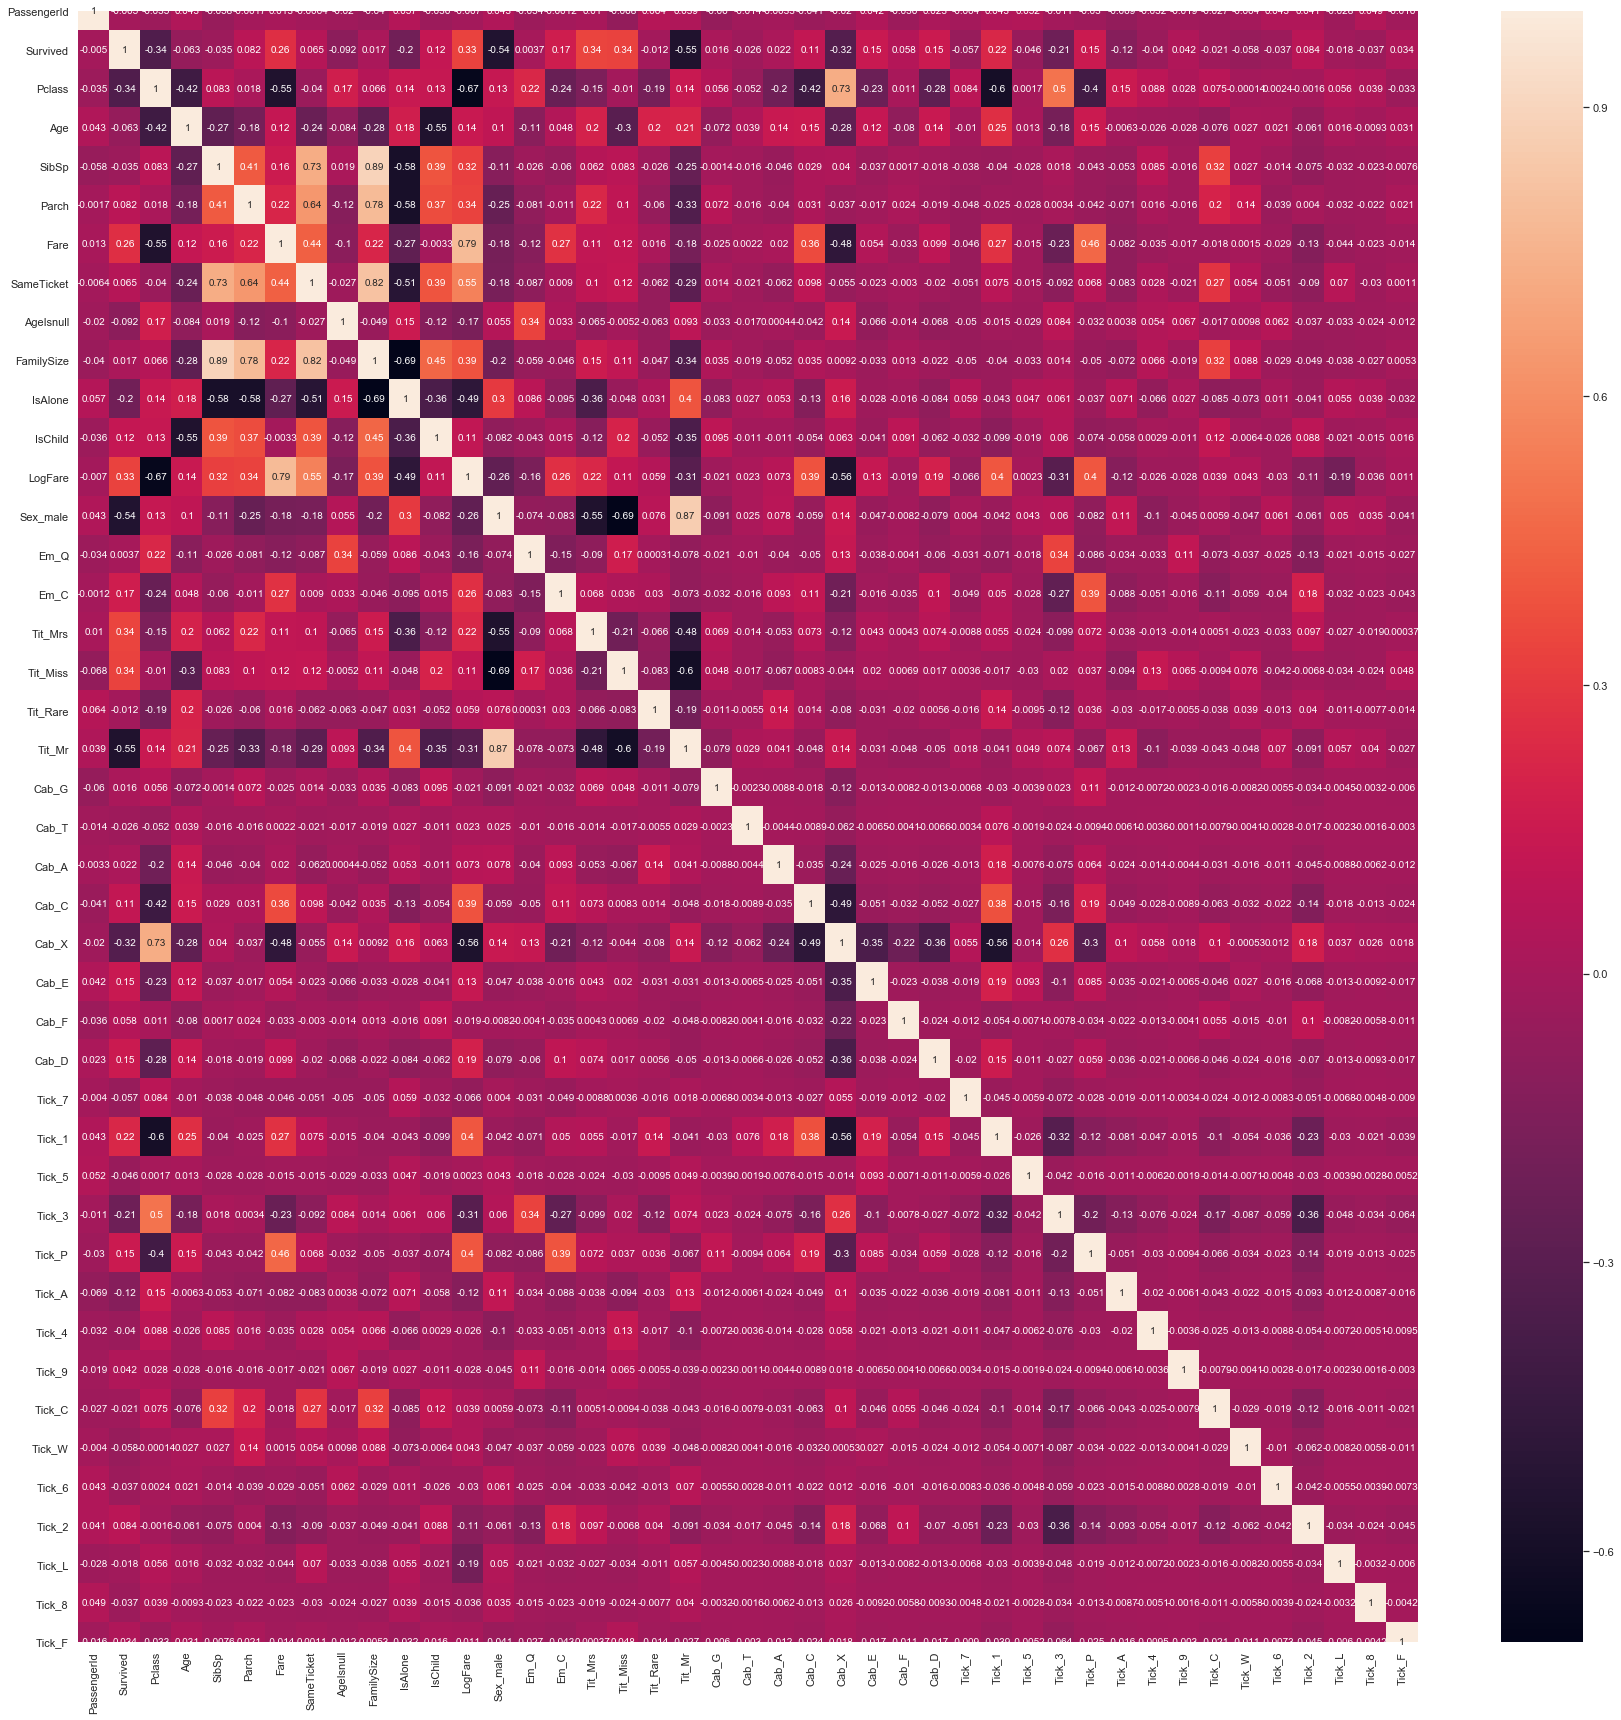

In [86]:
plt.figure(figsize=(30, 30)) 
sns.heatmap(train.corr(),annot=True)

 ## Save dataframe

In [87]:
!pwd

/Users/jsugawa/Projects/kaggle/titanic/notebook


In [88]:
train.to_csv('../data/train_features.csv',encoding='utf-8',index=False)
test.to_csv('../data/test_features.csv',encoding='utf-8',index=False)